# <center>The Many Solutions Tutorials - Part 1
---

## <center>The Iris Dataset

***

### This tutorial will mostly leverage the following libraries:
                
        --> scikit-learn <--
        -->     Keras    <--

***

### Specifically, you will learn how to:

1. Examine your problem
2. Prepare your data (raw data, feature extraction, feature engineering, etc.)
3. Spot-check a set of algorithms
4. Examine your results
5. Double-down on the algorithms that worked best

***

### The *Many Solutions* That We Will Be Looking At To The Iris Dataset Problem Are:

- k-Nearest Neighbors (k-NN)
- Naïve Bayes
- Logistic Regression
- Support Vector Machines (SVMs)
- Decision Trees
- Random Forests
- Perceptrons (Simple NNs)
- Multi-layer, feedforward neural networks (DNNs)
- Convolutional Neural Networks (CNNs)

***

### Let's Import The Required Libraries
***

In [13]:
# import the necessary packages

# SKLEARN ALGORITHM/METRIC PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# INTERFACING WITH IMAGES
from PIL import Image

# Navigating and controlling the OS
from imutils import paths
import os

#PLOTTING
import matplotlib.pyplot as plt

# DATA HANDLING
import numpy as np
import pandas as pd

## <center>Let's Look At The Iris Dataset Briefly<br>

***

![iris_1](./inline_images/iris_1.jpg)

***
**<center>Figure 1:</center>**
*<center>The Iris dataset is a numerical dataset describing Iris flowers.<br>It captures measurements of their sepal and petal length/width</center>*
*<center>Using these measurements we can attempt to predict flower species with Python and machine learning</center>*

***

***
## <center>Step 1: Exploring The Problem At Hand

***
**Why Use the Iris Dataset?**
- *The Iris Dataset is a simple, 'hello world'esque entry into machine learning and pattern recognition*

***

**What is the Iris Dataset?**
- *We call this dataset the “Iris Dataset” because it captures attributes of three Iris flower species:*
    - ***<font color="purple">Iris Setosa</font>***
    - ***<font color="lightpurple">Iris Versicolor</font>***
    - ***<font color="lightblue">Iris Virginica</font>***

***

**What are the Variables/Features We Are Concerned With?**
- *Each species of flower is quantified via four numerical attributes, all measured in centimeters:*
    1. ***Sepal length***
    2. ***Sepal width***
    3. ***Petal length***
    4. ***Petal width***

***

**What is the goal?**
- *Our goal is to train a machine learning model to correctly predict the **flower species** from the **measured attributes***

***

**Important Notes?**
- *One of the classes is linearly separable from the other two — the latter are not linearly separable from each other*
    - i.e. In order to correctly classify these the flower species, we will need a non-linear model
***

***
## <center>Step 2 : Prepare The Data

***
At this step we load the data and decide if we need to perform *feature extraction* or *feature engineering*:

- **Feature extraction** is the process of applying an algorithm to quantify your data in some manner
    - For example, when working with images we may wish to compute histograms to characterize the color of the image
<br><br>
- **Feature engineering** is the process of transforming your raw input data into a representation that better represents the underlying problem
    - Feature engineering is a more advanced technique
***

### <center>Step 2.1 -- Load The Data Into a Dataframe (From CSV)

In [14]:
# Import the data into a df (replace the default index column with the Id column)
df = pd.read_csv("./data/Iris.csv", index_col=0)

# print the first 10 entries (head)
print("\n\nFirst Ten Entries In The Dataframe...")
print("-------------------------------------------------------------------------")
print(df.head(10))
print("-------------------------------------------------------------------------")

# print the a random 10 entires (sample)
print("\n\nRandom Ten Entries In The Dataframe...")
print("-------------------------------------------------------------------------")
print(df.sample(n=10))
print("-------------------------------------------------------------------------")



First Ten Entries In The Dataframe...
-------------------------------------------------------------------------
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
6             5.4           3.9            1.7           0.4  Iris-setosa
7             4.6           3.4            1.4           0.3  Iris-setosa
8             5.0           3.4            1.5           0.2  Iris-setosa
9             4.4           2.9            1.4           0.2  Iris-setosa
10            4.9           3.1            1.5           0.1  Iris-setos

***
### <center><br>Step 2.2 - Feature Extraction (SKIP--NOT NECESSARY)
***

### <center><br>Step 2.3 - Feature Engineering</center>
***

- Normalize The Data
- Identify and Remove Outliers
- Check for Class Bias
- HELD
- HELD
- HELD

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
10%         4.800000      2.500000       1.400000      0.200000
40%         5.600000      3.000000       3.900000      1.160000
50%         5.800000      3.000000       4.350000      1.300000
60%         6.100000      3.100000       4.640000      1.500000
90%         6.900000      3.610000       5.800000      2.200000
max         7.900000      4.400000       6.900000      2.500000

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -2.820892e-16 -2.915955e-16  -3.709995e-16 -4.596323e-16
std     2.300184e-01  1.806643e-01   2.990543e-01  3.179836e-01
min    -4.287037e-01 -4.391667e-01  -4.

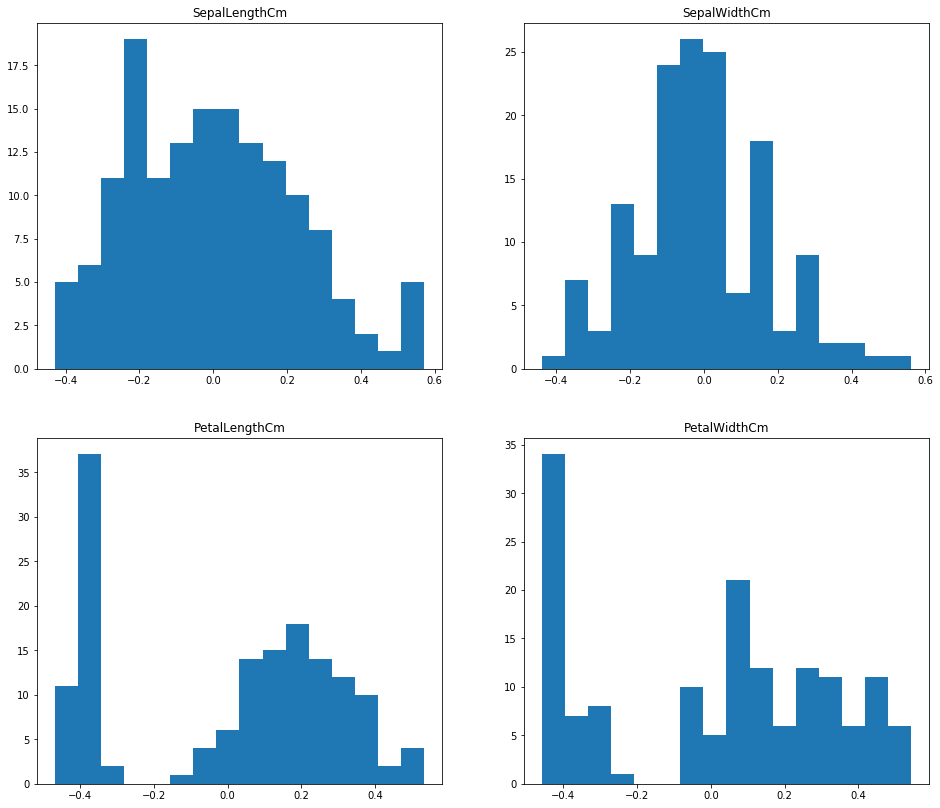

In [43]:
# Normalize The Dataframe Either Using The First Two Functions Sequentially or The Second Function Alone
def min_max_norm(array):
    array = [((x-np.min(array)) / (np.max(array)-np.min(array))) for x in array]
    return array

# Shift The Mean To Be 0 -- Feature Standardization
def feat_standardization(array):
    array = [((x-np.mean(array)) / np.std(array)) for x in array]
    return array

def best_normalization(array):
    array = [ ((x-np.mean(array)) / (np.max(array)-np.min(array))) for x in array]
    return array

df_norm = df.copy()

for column in df_norm:
    if column != "Species":
        
        #  -------------- Pick which normalization to use ----------------
        # df_norm[column] = min_max_norm(feat_standardization(df_norm[column]))
          df_norm[column] = best_normalization(df_norm[column])
        # df_norm[column] = feat_standardization(df_norm[column])
        #  ---------------------------------------------------------------
        
print(df.describe(percentiles=[0.1, 0.4, 0.6, 0.9]))
print()
print(df_norm.describe(percentiles=[0.1, 0.4, 0.6, 0.9]))

# USE THIS BETTER TO DETERMINE OUTLIERS (CAN'T SEE ANY)

plt.figure(figsize=[16,14])

for i, column in enumerate(df_norm):
    if column != "Species":
        plt.subplot(2,2,(i+1))
        plt.title(column)
        plt.hist(df_norm[column], bins=16)

***
### <center><br>Step 2.4 - Change The Labels From Words To Numbers
    
***

The 3 Flowers Will Be Encoded With Values:
- **0**  ***--------***  **IRIS-SETOSA**
- **1**  ***--------***  **IRIS-VERSICOLOR**
- **2**  ***--------***  **IRIS-VIRGINICA**

***

In [44]:
df_norm = df_norm.replace("Iris-setosa", 0)
df_norm = df_norm.replace("Iris-versicolor", 1)
df_norm = df_norm.replace("Iris-virginica", 2)

print(df_norm.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
Id                                                                    
16       -0.039815      0.560833      -0.382825     -0.332778        0
144       0.265741      0.060833       0.362938      0.458889        2
45       -0.206481      0.310833      -0.315028     -0.332778        0
130       0.376852     -0.022500       0.345989      0.167222        2
118       0.515741      0.310833       0.498531      0.417222        2


***
### <center><br>Step 2.5 - Split The Data into Train/Dev/Test Sets
    
***

Split the dataset up into 3 parts
- **80.00%**  *split for*  **TRAIN**
- **13.33%**  *split for*  **DEVELOPMENT**
- **6.666%**  *split for*  **TEST**

***

In [45]:
train_df, dev_test = train_test_split(df_norm, test_size=0.20, random_state=3)

val_df = dev_test
dev_df, test_df = train_test_split(dev_test, test_size=0.333, random_state=3)

print("\nOriginal dataframe has {} examples in {} categories".format(df_norm.shape[0], df_norm.shape[1]))
print("\nTraining dataframe has {} examples in {} categories".format(train_df.shape[0], train_df.shape[1]))
print("\nDevelopment dataframe has {} examples in {} categories".format(dev_df.shape[0], dev_df.shape[1]))
print("\nValidation dataframe has {} examples in {} categories".format(val_df.shape[0], val_df.shape[1]))
print("\nTest dataframe has {} examples in {} categories\n".format(test_df.shape[0], test_df.shape[1]))


Original dataframe has 150 examples in 5 categories

Training dataframe has 120 examples in 5 categories

Development dataframe has 20 examples in 5 categories

Validation dataframe has 30 examples in 5 categories

Test dataframe has 10 examples in 5 categories



***
## <center>Step 3 : Work Through The Various Alogirthms

***
At this step we will look at, and apply all the various ML algorithms to the task at hand to create a stable of models
***
![iris_2](./inline_images/iris_2.png)
***

**<center>Figure 2:</center>**
*<center>Over time, many statistical machine learning approaches have been developed</center>*
*<center>You can use this map from the scikit-learn team as a guide for the most popular methods</center>*

***
- **k-Nearest Neighbors (k-NN)**
    - h 
    - h
- **Naïve Bayes**
    - h 
    - h
- **Logistic Regression**
    - h 
    - h
- **Support Vector Machines (SVMs)**
    - h 
    - h
- **Decision Trees**
    - h 
    - h
- **Random Forests**
    - h 
    - h
- **Perceptrons (Simple NNs)**
    - h 
    - h
- **Multi-layer, feedforward neural networks (DNNs)**
    - h 
    - h
- **Convolutional Neural Networks (CNNs)**
    - h 
    - h

***

In [82]:
# We define the dictionary of models our script can use:
#
#        --- The   KEY   to the dictionary is the name of the model
#        --- The  VALUE  is the model itself

#        --- "key": value

models = {"knn": KNeighborsClassifier(n_neighbors=1),
          "naive_bayes": GaussianNB(),
          "logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
          "svm": SVC(kernel="rbf", gamma="auto"),
          "decision_tree": DecisionTreeClassifier(),
          "random_forest": RandomForestClassifier(n_estimators=100),
          "ml_perceptron": MLPClassifier(max_iter=5000)
}

In [83]:
# Choose the model you wish to implement
model = models["ml_perceptron"]
print(type(model))

<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>


In [84]:
# Model accepts all but the last column as the inputs and the outputs is defined as the last column (up to -1, and -1 itself)
model.fit(train_df.iloc[:,:-1], train_df.iloc[:,-1])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
predictions = model.predict(val_df.iloc[:,:-1])

In [86]:
print(classification_report(val_df.iloc[:,-1], predictions, target_names=["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"]))

                 precision    recall  f1-score   support

    Iris-Setosa       1.00      1.00      1.00        10
Iris-Versicolor       1.00      1.00      1.00        10
 Iris-Virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

